In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import math
import cost
import cost2

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn import metrics

train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
target = train['target'].values 

/Users/WANN-JIUN/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Cost of logistic regression (trainning set): 0.53
Cost of logistic regression (test set): 0.53
Accuracy of logistic regression: 0.76
Cost of decision tree (trainning set): 0.50
Cost of decision tree (test set): 0.50
Accuracy of decision tree: 0.76


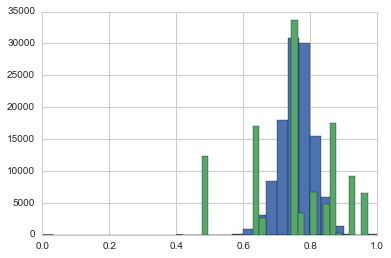

In [2]:
# train['v22-1']=train['v22'].fillna('@@@@').apply(lambda x:'@'*(4-len(str(x)))+str(x)).apply(lambda x:ord(x[0]))
# test['v22-1']=test['v22'].fillna('@@@@').apply(lambda x:'@'*(4-len(str(x)))+str(x)).apply(lambda x:ord(x[0]))
# train['v22-2']=train['v22'].fillna('@@@@').apply(lambda x:'@'*(4-len(str(x)))+str(x)).apply(lambda x:ord(x[1]))
# test['v22-2']=test['v22'].fillna('@@@@').apply(lambda x:'@'*(4-len(str(x)))+str(x)).apply(lambda x:ord(x[1]))
# train['v22-3']=train['v22'].fillna('@@@@').apply(lambda x:'@'*(4-len(str(x)))+str(x)).apply(lambda x:ord(x[2]))
# test['v22-3']=test['v22'].fillna('@@@@').apply(lambda x:'@'*(4-len(str(x)))+str(x)).apply(lambda x:ord(x[2]))
# train['v22-4']=train['v22'].fillna('@@@@').apply(lambda x:'@'*(4-len(str(x)))+str(x)).apply(lambda x:ord(x[3]))
# test['v22-4']=test['v22'].fillna('@@@@').apply(lambda x:'@'*(4-len(str(x)))+str(x)).apply(lambda x:ord(x[3]))

# drop_list=['v91','v1', 'v8', 'v10', 'v15', 'v17', 'v25', 'v29', 'v34',\
#            'v41', 'v46', 'v54', 'v64', 'v67','v97', 'v105', 'v111', 'v122']
drop_list = []
train = train.drop(['ID','target'] + drop_list,axis=1).fillna(-999)
test = test.drop(['ID'] + drop_list,axis=1).fillna(-999)
 
refcols=list(train.columns)
 
# for elt in refcols:
#     if train[elt].dtype == 'O':
#         train[elt], temp = pd.factorize(train[elt])
#         test[elt] = temp.get_indexer(test[elt])
#     else:
#         train[elt] = train[elt].round(5)
#         test[elt] = test[elt].round(5)

for elt in refcols:
    if train[elt].dtype == 'O':
        train = train.drop(elt,axis=1)
        test = test.drop(elt,axis=1) 
    else:
        train[elt] = train[elt].round(5)
        test[elt] = test[elt].round(5)
        
X = train
y = np.ravel(target)        
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Logistic regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
theta = np.transpose(log_model.coef_)
cost_train_log = cost.valuee(X_train,y_train,theta)
cost_test_log = cost.valuee(X_test,y_test,theta)
print "Cost of logistic regression (trainning set): %.2f" %cost_train_log
print "Cost of logistic regression (test set): %.2f" %cost_test_log
print "Accuracy of logistic regression: %.2f" %metrics.accuracy_score(y_test,y_pred_log)

pred_log = log_model.predict_proba(test)
submission = pd.read_csv('./sample_submission.csv')
submission.index = submission.ID
submission.PredictedProb = pred_log[:,1]
submission.PredictedProb.hist(bins=30)

# Decision trees 
tree_model = DecisionTreeClassifier(max_depth=4,random_state=0)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
p_train_tree = tree_model.predict_proba(X_train) 
p_test_tree = tree_model.predict_proba(X_test) 
cost_train_tree = cost2.valuee(X_train,p_train_tree[:,1],y_train)
cost_test_tree = cost2.valuee(X_test,p_test_tree[:,1],y_test)
print "Cost of decision tree (trainning set): %.2f" %cost_train_tree
print "Cost of decision tree (test set): %.2f" %cost_test_tree
print "Accuracy of decision tree: %.2f" %metrics.accuracy_score(y_test,y_pred_tree)

pred_tree = tree_model.predict_proba(test)
submission = pd.read_csv('./sample_submission.csv')
submission.index = submission.ID
submission.PredictedProb = pred_tree[:,1]
submission.PredictedProb.hist(bins=30)

# # Random forests
# forest_model = RandomForestClassifier(n_estimators=100,random_state=0)
# forest_model.fit(X_train, y_train)
# y_pred_forest = forest_model.predict(X_test)
# p_train_forest = forest_model.predict_proba(X_train) 
# p_test_forest = forest_model.predict_proba(X_test) 
# cost_train_forest = cost2.valuee(X_train,p_train_forest[:,1],y_train)
# cost_test_forest = cost2.valuee(X_test,p_test_forest[:,1],y_test)
# print "Cost of random forest (trainning set): %.2f" %cost_train_forest
# print "Cost of random forest (test set): %.2f" %cost_test_forest
# print "Accuracy of random forest: %.2f" %metrics.accuracy_score(y_test,y_pred_forest)
# pred_forest = forest_model.predict_proba(test)
# submission = pd.read_csv('./sample_submission.csv')
# submission.index = submission.ID
# submission.PredictedProb = pred_forest[:,1]
# submission.PredictedProb.hist(bins=30)

# # Naive Bayes
# naive_model = GaussianNB()
# naive_model.fit(X_train, y_train)
# y_pred_naive = naive_model.predict(X_test)
# print "Accuracy of naive Bayes: %.2f" %metrics.accuracy_score(y_test,y_pred_naive)
# pred_naive = naive_model.predict_proba(test)
# submission = pd.read_csv('./sample_submission.csv')
# submission.index = submission.ID
# submission.PredictedProb = pred_naive[:,1]
# submission.PredictedProb.hist(bins=30)

# # SVM
# svm_model = SVC()
# svm_model.fit(X_train, y_train)
# y_pred_svm = svm_model.predict(X_test)
# print "Accuracy of SVM: %.2f" %metrics.accuracy_score(y_test,y_pred_svm)
# pred_svm = svm_model.predict_proba(test)
# submission = pd.read_csv('./sample_submission.csv')
# submission.index = submission.ID
# submission.PredictedProb = pred_svm[:,1]
# submission.PredictedProb.hist(bins=30)

# submission = pd.read_csv('./sample_submission.csv')
# submission.index = submission.ID
# submission.PredictedProb = pred_svm[:,1]
# submission.to_csv('./machine_learning_results.csv', index=False)
# submission.PredictedProb.hist(bins=30)